# **Welcome!**

## Introduction to Machine Learning



## **Lecturer :** Matteo Alberti

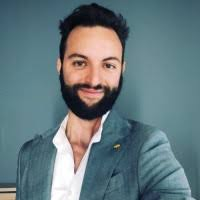

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


## Introduction to Supervised and Unsupervised Machine Learning

![](https://www.diegocalvo.es/wp-content/uploads/2018/09/machine-learning-classification.png)


## Introduction to Linear Regression Problem

***Don't worry.. this will be the only formula that we'll use today***

$y=f(x)$

technically :

$y=a + b*X + e$

The model is defined in terms of parameters called coefficients (beta), where there is one coefficient per input and an additional coefficient that provides the intercept or bias.

For example, a problem with inputs X with m variables x1, x2, …, xm will have coefficients beta1, beta2, …, betam and beta0. A given input is predicted as the weighted sum of the inputs for the example and the coefficients.

$yhat = alfa + beta_1 * x_1 + beta_2 * x_2 + … + beta_p * x_p + error$

## An example of linear regression

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)

## what do we minimize?

![](https://www.statisticshowto.com/wp-content/uploads/2015/03/residual.png)

## When don't we have a linear relationship between variables?

![](https://i.stack.imgur.com/uB7pm.png)



### Models too simple or too complex?

![](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

### Load Packages

In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## From zero to Linear Regression 

- Data Loading

- Data Preparation

- Understand the task! Supervised, Unsupervised Learning?

- Assumptions & Models

- Metrics and Evaluation

- Test yourself!



## First Exapled (GUIDED!)



### Boston house dataset

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000$$
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

### Translated

- CRIM: tasso di criminalità pro capite per città
- ZN: Proporzione di terreno residenziale suddiviso in zone per lotti superiori a 25.000 piedi quadrati
- INDUS: proporzione di acri di attività commerciali non al dettaglio per città
- CHAS: variabile fittizia Charles River (= 1 se il tratto confina con il fiume; 0 altrimenti)
- NOX: concentrazione di ossido nitrico (parti per 10 milioni)
- RM: numero medio di stanze per abitazione
- ETÀ: Proporzione di unità abitate dai proprietari costruite prima del 1940
- DIS: distanze ponderate da cinque centri per l'impiego di Boston
- RAD: Indice di accessibilità alle autostrade radiali
- TASSA: aliquota dell'imposta sulla proprietà a valore intero per 10.000 $$
- PTRATIO: rapporto alunni-insegnanti per città
- B: 1000 (Bk - 0.63) ², dove Bk è la proporzione di [persone di discendenza afroamericana] per città
- LSTAT: percentuale di status inferiore della popolazione
- MEDV: valore medio delle case occupate dai proprietari in $ 1000

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [4]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [6]:
# Which is the shape of our data?



In [7]:
# What about the target?

boston['MEDV'] = boston_dataset.target

### Data Preprocessing

***what should I check about my data?***


In [8]:
# There are any missing values? Look dropna function!

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## EDA and Assumptions

- When we use parametetric statistical models


In [9]:

# What is EDA? Exploratory Data Analysis, in this case : looking for the relationship of the target variable with other features.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()


*What Should I see from this plot??*

- Data distribution!


### Normal Distribution

In [10]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

There are many other distributions...

*Poisson, Binomial, Trinomial, Gamma, Exponential, Bernulli, . . . .*

**But what does it mean converge into a distribution?**

In [11]:
# Bernulli Example

# A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure)  | TESTA O CROCE!

from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10,p=0.5)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')



[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

Come back to our Boston Data set!


***How can I check if normality is satisfied?***

- Graphical tests
- Shapiro Wilk test



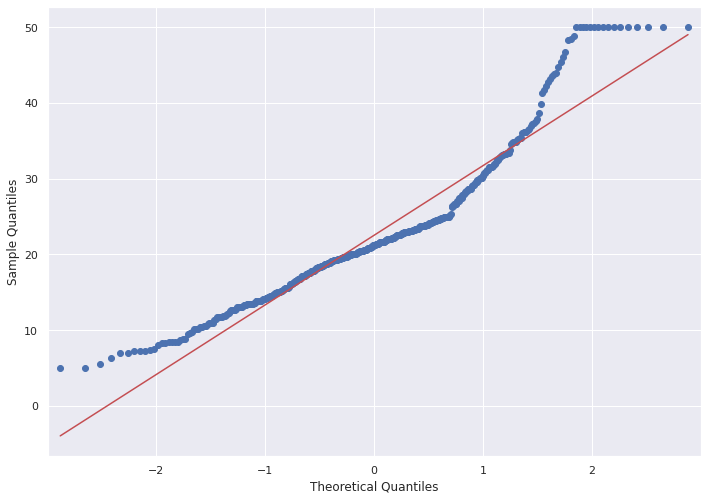

In [12]:
from statsmodels.graphics.gofplots import qqplot

qqplot(boston['MEDV'], line='s')
plt.show()

### Which are our Outliers?

In [13]:
## Suggestion! But consider that creativity is your best tool!

sns.boxplot(x=boston['MEDV'])

#### When you finish you can test with the above functions or use the a no-grafical test

In [14]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(boston['MEDV'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


## Multi-collinearity

Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard for interpretation of model and also creates overfitting problem.

**But the main problem is the following :**

- When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly.


### Correlation Matrix

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.


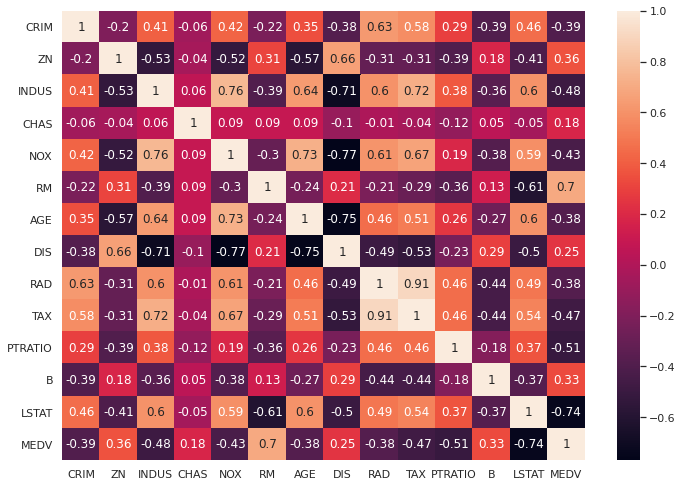

In [15]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

*Which is the Correlation Matrix range?*

- from :
- to :


*Which features will we select?*

*Multi-Collinearity?*


## Homoschedasticity

![](https://miro.medium.com/max/700/1*V-ZwpBFum-jP710q_fyjBA.png)

- Often occurs in those data sets which have a large range between the largest and the smallest observed values i.e. when there are outliers.
- When model is not correctly specified.
- If observations are mixed with different measures of scale.
- When incorrect transformation of data is used to perform the regression.
Skewness in the distribution of a regressor, and may be some other sources.

### Show the final Dataframe with all the selected columns

In [16]:
# select by name df=[[]] | select by .iloc func



In [17]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]

## Data Splitting

There are lots of ways to split our data and lots of packages

- Divided manually
- build-in function inside sklearn
  - train_test_val
  - . . . 


And also depend on data type / dataset size


In [18]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(boston[boston.columns[:-1]], boston[boston.columns[-1:]], train_size=0.65,test_size=0.35, random_state=101)

In [19]:
print ("Original: ", boston.shape, "\n")

print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)

print("X_test: ", X_test.shape)
print ("y_test: {} \n ".format(y_test.shape))

print ("Reconstruct X : ", X_train.shape[0] + X_test.shape[0])

# Check also Y

Original:  (506, 14) 

X_train:  (328, 13)
y_train:  (328, 1)
X_test:  (178, 13)
y_test: (178, 1) 
 
Reconstruct X :  506


### K-fold cross-validation

![](https://static.packt-cdn.com/products/9781789617740/graphics/b04c27c5-7e3f-428a-9aa6-bb3ebcd3584c.png)

## Model Definition & Traning

In [20]:
from sklearn.linear_model import LinearRegression

# Fitting the model
boston_model = LinearRegression()
boston_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
### How do I evaluate my model?  P.s. look at .score funcion ok sklearn!

# Returning the R^2 for the model
boston_r2 = boston_model.score(X_test, y_test)
print('R^2: {0}'.format(boston_r2))

R^2: 0.7165006906291422


### We have lots of metrics of evaluation 

*Let me show you the most relevant*

- Mean Squared Error**(MSE)**        

$$ MSE = \frac {\sum (y - y_{hat})^2}{N} $$

it penalizes even a small error which leads to over-estimation of how bad the model is

- Root-Mean-Squared-Error**(RMSE)**

$$ RMSE = \sqrt \frac {\sum (y - y_{hat})^2}{N} $$

This implies that RMSE is useful when large errors are undesired.

- Mean-Absolute-Error**(MAE)**

$$ MSE = \frac {\sum |y - y_{hat}|}{N} $$

The MAE is more robust to outliers and does not penalize the errors as extremely as mse




- **R²** or Coefficient of Determination.

*Question :* which is the range of $R^2$? Why?

- **Adjusted R²**

As $R^2$ but penalize too variables

## Question from your manager : Which features are the most relevant?


Feature: 0, Score: -0.08869
Feature: 1, Score: 0.04109
Feature: 2, Score: 0.05550
Feature: 3, Score: 3.20052
Feature: 4, Score: -17.09665
Feature: 5, Score: 3.23009
Feature: 6, Score: 0.01023
Feature: 7, Score: -1.25788
Feature: 8, Score: 0.25955
Feature: 9, Score: -0.01087
Feature: 10, Score: -0.93421
Feature: 11, Score: 0.00693
Feature: 12, Score: -0.59644


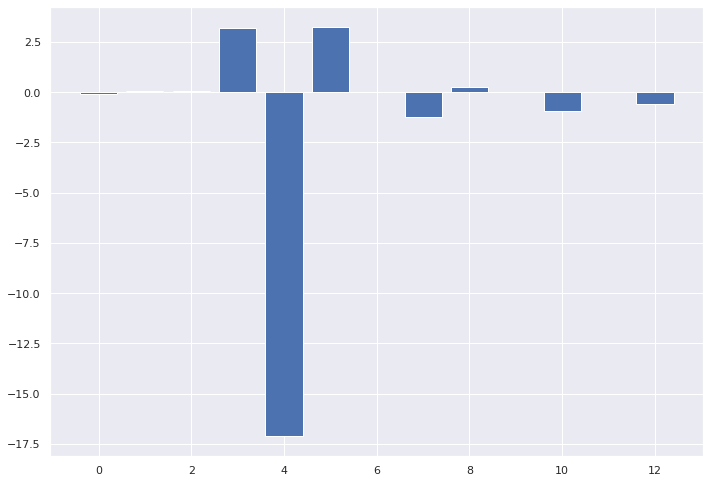

In [22]:
importance = boston_model.coef_
# summarize feature importance
for i,v in enumerate(importance[0]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show()

## Now try to predict!

- Add a new line to your dataset and predict the HousePrice

In [23]:
boston_model.predict(X_test)

array([[39.28877677],
       [27.52508873],
       [16.33507434],
       [16.91739422],
       [30.52414302],
       [31.70452201],
       [38.19967245],
       [ 8.09558231],
       [33.41934237],
       [ 7.01906866],
       [29.9069862 ],
       [13.59009489],
       [16.27656313],
       [17.55394356],
       [24.86658295],
       [20.14089272],
       [ 6.93628728],
       [32.50403985],
       [28.1119817 ],
       [24.68318074],
       [12.35030807],
       [20.35964205],
       [22.49728872],
       [24.90596867],
       [33.28796169],
       [18.57786862],
       [31.58653223],
       [18.83312218],
       [26.51390213],
       [33.85425507],
       [20.16924478],
       [18.44615205],
       [36.47895957],
       [43.5686636 ],
       [29.63143119],
       [22.18600008],
       [15.70605373],
       [18.19229093],
       [ 3.98276724],
       [30.55371294],
       [23.99327237],
       [17.27752189],
       [33.84510564],
       [13.75249655],
       [17.52915504],
       [25

# BREAK!!

Do yourself on another dataset!

**Need a suggest?**

- Try with : **load_diabetes**
- Try with : **Kaggle**  : www.kaggle.com



Do you want any good reference for learning in easy and good way?

- https://machinelearningmastery.com/

# Or we can make it a bit more complex!

In [74]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

year  month  day  dep_time  dep_delay  ...  dest  air_time distance hour  minute
0  2014      1    1       1.0       96.0  ...   ANC     194.0     1542  0.0     1.0
1  2014      1    1       4.0       -6.0  ...   CLT     252.0     2279  0.0     4.0
2  2014      1    1       8.0       13.0  ...   IAH     201.0     1825  0.0     8.0
3  2014      1    1      28.0       -2.0  ...   CLT     251.0     2282  0.0    28.0
4  2014      1    1      34.0       44.0  ...   ANC     201.0     1448  0.0    34.0

[5 rows x 16 columns]

In [52]:
print(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       162049 non-null  int64  
 1   month      162049 non-null  int64  
 2   day        162049 non-null  int64  
 3   dep_time   161192 non-null  float64
 4   dep_delay  161192 non-null  float64
 5   arr_time   161061 non-null  float64
 6   arr_delay  160748 non-null  float64
 7   carrier    162049 non-null  object 
 8   tailnum    161801 non-null  object 
 9   flight     162049 non-null  int64  
 10  origin     162049 non-null  object 
 11  dest       162049 non-null  object 
 12  air_time   160748 non-null  float64
 13  distance   162049 non-null  int64  
 14  hour       161192 non-null  float64
 15  minute     161192 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


In [53]:
df_flights.year.unique()

array([2014])

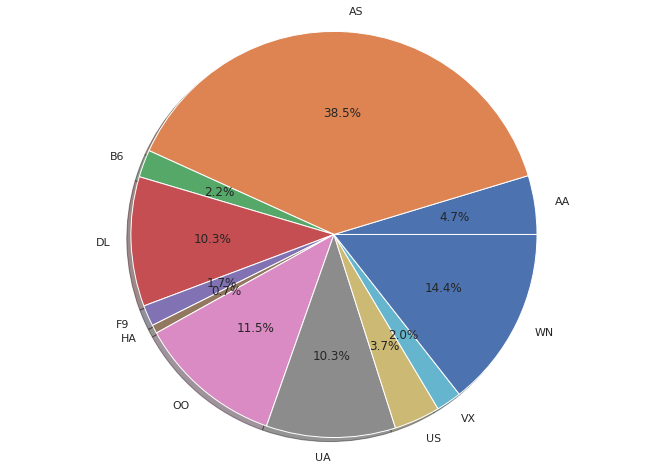

In [63]:
## PIE PLOT

labels = df_flights['carrier'].astype('category').cat.categories.tolist()
counts = df_flights['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

## Missing values

In [57]:
print(df_flights.isnull().sum())

year            0
month           0
day             0
dep_time      857
dep_delay     857
arr_time      988
arr_delay    1301
carrier         0
tailnum       248
flight          0
origin          0
dest            0
air_time     1301
distance        0
hour          857
minute        857
dtype: int64


(162049, 16)

In [61]:
# TAILNUM EXAMPLE 

df_flights2 = df_flights.fillna(df_flights['tailnum'].value_counts().index[0])


### Any differences?

That's why it's always a good idea to investigate your raw dataset thoroughly and then think about cleaning it.

One of the most common ways to analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot

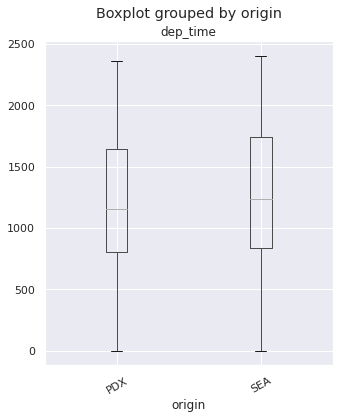

In [36]:
df_flights.boxplot('dep_time','origin',rot = 30,figsize=(5,6))

## We want to focus on categorical variables : 

In [82]:
# use .copy function

cat_variables_flights = df_flights.select_dtypes(include=['object']).copy()
cat_variables_flights.head()

carrier tailnum origin dest
0      AS  N508AS    PDX  ANC
1      US  N195UW    SEA  CLT
2      UA  N37422    PDX  IAH
3      US  N547UW    PDX  CLT
4      AS  N762AS    SEA  ANC

# Encoding Categorical Data!

- Replacing values
- Label Encoding
- One-Hot encoding
- Binary encoding

**REPLACING**

In [66]:


replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                  'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}

## OR WITH DICS
labels = cat_variables_flights['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}


In [80]:
rep1 = cat_variables_flights.copy()
rep2 = cat_variables_flights.copy()

rep1.replace(replace_map_comp, inplace=True)
print(rep1.head())

## OR

rep2['carrier'] = rep2['carrier'].astype('category').cat.codes

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


**Label Encoding**

Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

In [86]:
rep2.head()

carrier tailnum origin dest
0      AS  N508AS    PDX  ANC
1      US  N195UW    SEA  CLT
2      UA  N37422    PDX  IAH
3      US  N547UW    PDX  CLT
4      AS  N762AS    SEA  ANC

In [91]:
rep3 = cat_variables_flights.copy()

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
rep3['carrier_code'] = lb_make.fit_transform(rep3['carrier'])

rep3.head()

carrier tailnum origin dest  carrier_code
0      AS  N508AS    PDX  ANC             1
1      US  N195UW    SEA  CLT             8
2      UA  N37422    PDX  IAH             7
3      US  N547UW    PDX  CLT             8
4      AS  N762AS    SEA  ANC             1

**One-Hot encoding**

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column

In [93]:
cat_df_flights_onehot = pd.get_dummies(cat_variables_flights, columns=['carrier'], prefix = ['carrier'])

cat_df_flights_onehot.head()

tailnum origin dest  ...  carrier_US  carrier_VX  carrier_WN
0  N508AS    PDX  ANC  ...           0           0           0
1  N195UW    SEA  CLT  ...           1           0           0
2  N37422    PDX  IAH  ...           0           0           0
3  N547UW    PDX  CLT  ...           1           0           0
4  N762AS    SEA  ANC  ...           0           0           0

[5 rows x 14 columns]

**Binary Encoding**

ordinal --> binary code

In [94]:
! pip install category_encoders
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['carrier'])
df_binary = encoder.fit_transform(cat_variables_flights)

df_binary.head()

# WORD TO VEC ect ect